#### Tom Genlis & Arnaud Baradat - SCIA 2024

# Kaggle Competition: ML Olympiad - Genome Sequences Classification
# Introduction

In the realm of genomics, understanding the distinct genetic variations among different species is crucial. One application of this understanding is the classification of DNA sequences, which can, for instance, differentiate between human and gorilla DNA. This analysis aims to investigate various machine learning approaches to classify given DNA sequences into one of these two categories, leveraging a dataset provided in the Kaggle competition, [ML Olympiad - Genome Sequences Classification](https://www.kaggle.com/competitions/ml-olympiad-gdscuiz-and-tfugagadir/data).

The dataset comprises sequences of DNA, each labeled as either 'human' or 'gorilla'. The primary goal is to build and compare models that can accurately predict these labels based on the DNA sequences. Five different approaches will be explored:
- Convolutional Neural Networks (CNN)
- Pre-trained BERT model specialized for genomic sequences
- Long Short-Term Memory networks (LSTM)
- Random Forest
- Multi Layer Perceptron (MLP)

Through this analysis, we aim to discern which model or combination of models yields the highest accuracy in classifying the DNA sequences. Additionally, we will look into potential improvements and optimizations to enhance the performance of the chosen models.

---

In [ ]:
!pip install pandas

# Dataset
The dataset provided in the [ML Olympiad - Genome Sequences Classification competition](https://www.kaggle.com/competitions/ml-olympiad-gdscuiz-and-tfugagadir/data) consists of DNA sequences labeled as either 'human' or 'gorilla'. In this section, we'll explore the dataset to understand its structure, size, and the distribution of labels. We'll also conduct some preliminary analysis to identify any potential challenges or considerations for the subsequent modeling steps.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("./data/train.csv")

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,id,genome_sequence,species
0,0,11408003,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,Gorilla_gorilla
1,1,18639873,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,Gorilla_gorilla
2,2,9869298,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,Homo_sapiens
3,3,10762804,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,Gorilla_gorilla
4,4,13724428,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,Gorilla_gorilla


Let's lower the row count to speed up the analysis, as we won't use that much data anyway.

In [2]:
data = data.sample(n=1000000)

## Dataset Structure
Let's start by examining the structure of the dataset including the number of samples, features, and the distribution of labels.

In [7]:
# Getting the shape of the dataset
dataset_shape = data.shape
print(
    f"The dataset contains {dataset_shape[0]} samples and {dataset_shape[1]} columns."
)

# Checking the distribution of labels
label_distribution = data["species"].value_counts(normalize=True)
label_distribution

The dataset contains 1000000 samples and 4 columns.


species
Homo_sapiens       0.500214
Gorilla_gorilla    0.499786
Name: proportion, dtype: float64

## Preliminary Analysis
We'll conduct some preliminary analysis to better understand the characteristics of the DNA sequences. This includes examining the length of the sequences, the distribution of nucleotide bases (A, C, G, T), and any missing or anomalous values.

In [9]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

Unnamed: 0         0
id                 0
genome_sequence    0
species            0
dtype: int64

In [10]:
# Exploring the length of DNA sequences
sequence_lengths = data["genome_sequence"].apply(len)
sequence_lengths.describe()

count    1000000.000000
mean          79.999977
std            0.023000
min           57.000000
25%           80.000000
50%           80.000000
75%           80.000000
max           80.000000
Name: genome_sequence, dtype: float64

In [17]:
# Function to count the occurrences of each nucleotide in a sequence
# Concatenating all sequences into a single string
all_sequences = "".join(data["genome_sequence"])

# Counting the occurrences of each nucleotide
base_counts = pd.Series(
    {
        "a": all_sequences.count("a"),
        "c": all_sequences.count("c"),
        "g": all_sequences.count("g"),
        "t": all_sequences.count("t"),
    }
)

# Displaying the counts
base_counts

a    23912760
c    16068705
g    15967064
t    24051448
dtype: int64

The preliminary analysis provides insight into the basic characteristics of the DNA sequences in the dataset. The findings from this section will inform the choice and configuration of machine learning models in the subsequent steps of this analysis.

---

# Approaches
In this section, we explore various machine learning approaches to classify the DNA sequences as either human or gorilla. The models chosen for this analysis span a range of complexities and methodologies, from traditional machine learning to deep learning architectures. The objective is to compare the performance and insights gleaned from each model, thereby identifying the most effective strategy for this classification task. The approaches considered include Convolutional Neural Networks (CNN), a genomic sequences pre-trained BERT model, Long Short-Term Memory networks (LSTM), Random Forest, and Multi Layer Perceptron (MLP).

## Convolutional Neural Networks (CNN)
Convolutional Neural Networks (CNN) are particularly adept at identifying patterns in spatial or temporal data, making them a suitable choice for sequence data like DNA sequences. The convolution layers can detect motifs in the DNA sequences which can be crucial for accurate classification.

We had two approaches for the CNN model:
- the first one reshaped the one-hot encoded DNA sequences into a 2D image and used a CNN model to classify the images
- the second one used a 1D CNN model to classify the DNA sequences directly

In [ ]:
!pip install pandas tensorflow numpy matplotlib scikit-learn

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Load the data
train_data = pd.read_csv(
    "./data/train.csv",
    usecols=["genome_sequence", "species"],
)
train_data = train_data.sample(n=500000)
species_counts = train_data["species"].value_counts(normalize=True)
print(species_counts)

species
Gorilla_gorilla    0.500042
Homo_sapiens       0.499958
Name: proportion, dtype: float64


In [ ]:
# Build the model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(9, 9, 4),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(0.01),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(0.01),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(
            filters=256,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(0.01),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)
        ),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(
            2, activation="softmax"
        ),  # Assuming 2 classes, adjust if necessary
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          2368      
                                                                 
 batch_normalization (BatchN  (None, 9, 9, 64)         256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 batch_normalization_1 (Batc  (None, 5, 5, 128)        5

In [ ]:
def preprocess_dataset(data, test=False):
    def one_hot_encode(sequence):
        mapping = {
            "a": [1, 0, 0, 0],
            "c": [0, 1, 0, 0],
            "g": [0, 0, 1, 0],
            "t": [0, 0, 0, 1],
        }
        return [mapping[char] for char in sequence]

    encoded_seqs = data["genome_sequence"].apply(one_hot_encode)
    padded_seqs = tf.keras.preprocessing.sequence.pad_sequences(
        encoded_seqs, padding="post"
    )

    if not test:
        # Encode the species labels into numerical values
        label_encoder = LabelEncoder()
        encoded_labels = label_encoder.fit_transform(data["species"])
        encoded_labels = tf.keras.utils.to_categorical(encoded_labels, num_classes=2)

    num_samples = len(padded_seqs)
    reshaped_data = np.zeros(
        (num_samples, 9, 9, 4)
    )  # Initialize an empty array of the desired shape

    for i, sequence in enumerate(padded_seqs):
        # Reshape the sequence to a 2D 80x4 matrix
        sequence_2d = sequence.reshape(-1, 4)

        # Pad this matrix with a row of zeros to get a 81x4 matrix
        padded_sequence = np.vstack((sequence_2d, np.zeros((1, 4))))

        # Reshape this matrix to a 9x9x4 tensor
        reshaped_sequence = padded_sequence.reshape(9, 9, 4)

        # Store the reshaped sequence in the reshaped_data array
        reshaped_data[i] = reshaped_sequence
    if not test:
        return reshaped_data, encoded_labels
    else:
        return reshaped_data

In [ ]:
x_train_data, y_train_data = preprocess_dataset(train_data)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x_train_data, y_train_data, test_size=0.2, random_state=42
)

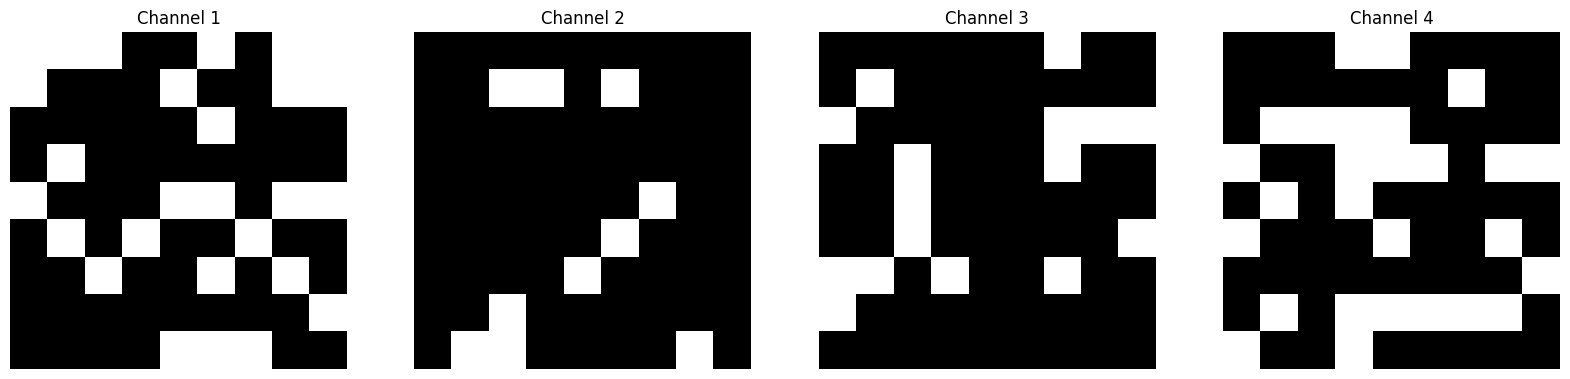

In [ ]:
def plot_images(data_piece):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Assuming data_piece has shape (9, 9, 4)
    for i in range(4):
        img = data_piece[:, :, i]
        axs[i].imshow(img, cmap="gray")  # or choose a different colormap if preferred
        axs[i].axis("off")  # to remove the axes for clarity
        axs[i].set_title(f"Channel {i+1}")

    plt.show()


plot_images(x_train[0])

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

# Define the Early Stopping and Reduce LR On Plateau callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=3, min_lr=0.00001, verbose=1
)

In [ ]:
# Train the model with the callbacks
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=25,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/25


2023-10-06 15:36:37.673959: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3125/3125 [==============================] - 29s 6ms/step - loss: 1.0012 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5006 - lr: 0.0010
Epoch 2/25
3125/3125 [==============================] - 22s 7ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4994 - lr: 0.0010
Epoch 3/25
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4994 - lr: 0.0010
Epoch 4/25
3119/3125 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5001
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.5006 - lr: 0.0010
Epoch 5/25
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5006 - lr: 2.0000e-04
Epoch 6/25
3125/3125 [==============================]

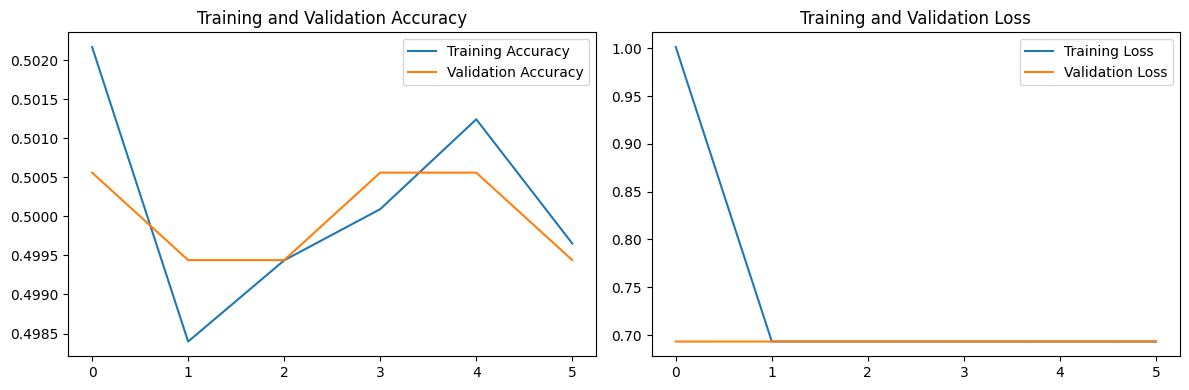

In [ ]:
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()

This approch led to an accuracy fluctuating around 50% which is not really good considered this is random guessing. However, as we will see thourought the analysis, and also in the best scores of the competition, the task is very hard and no model was able to get a good accuracy.

We had another approach of CNNs which used 1D convolutions. Let's see how it performs.

In [ ]:
!pip install pandas numpy scikit-learn matplotlib torch torchvision torchaudio tqdm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm


random_state = 42

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df = pd.read_csv(
    "./data/train.csv", usecols=["id", "genome_sequence", "species"]
)  # Removes the index column of the csv
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (19800000, 3)


In [ ]:
df.head()

,id,genome_sequence,species
0,11408003,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,Gorilla_gorilla
1,18639873,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,Gorilla_gorilla
2,9869298,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,Homo_sapiens
3,10762804,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,Gorilla_gorilla
4,13724428,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,Gorilla_gorilla


In [ ]:
# Check that there are no missing values
df.isnull().sum()

id                 0
genome_sequence    0
species            0
dtype: int64

In [ ]:
# Check the balancing of the target
df.species.value_counts()

species
Homo_sapiens       9900585
Gorilla_gorilla    9899415
Name: count, dtype: int64

In [ ]:
# Get the average length of the genome sequences
df.genome_sequence.apply(lambda x: len(x)).value_counts()

genome_sequence
80    19799984
37           2
39           1
2            1
30           1
25           1
16           1
3            1
15           1
57           1
48           1
32           1
31           1
43           1
60           1
50           1
Name: count, dtype: int64

Let's remove the few that aren't of the 80 long

In [ ]:
# Remove the <20 genome sequences that are not 80 long
df = df[df.genome_sequence.apply(lambda x: len(x)) == 80]
df.shape

(19799984, 3)

## Data Preparation

In [ ]:
# Create a label column that change the species name into a number
labels_dict = {species: i for i, species in enumerate(df.species.unique())}
df["label"] = df.species.map(labels_dict)
df.head()

,id,genome_sequence,species,label
0,11408003,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,Gorilla_gorilla,0
1,18639873,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,Gorilla_gorilla,0
2,9869298,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,Homo_sapiens,1
3,10762804,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,Gorilla_gorilla,0
4,13724428,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,Gorilla_gorilla,0


In [ ]:
# Define a function to one hot encode a DNA sequence
def one_hot_encode_dna(seq):
    return np.array(
        [
            [
                1 if c == "A" else 0,
                1 if c == "C" else 0,
                1 if c == "G" else 0,
                1 if c == "T" else 0,
            ]
            for c in seq.upper()
        ]
    )

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=["id", "species"])
df.head()

,genome_sequence,label
0,ccacatcccctccagcacctgttgtttcctgactttttaatgattg...,0
1,tgtttacttgccaatctttgtttagctgtcagagtggcttgctaaa...,0
2,tctgtgaagaaagacattggtagcttgatggggatgacattgaatc...,1
3,ttgtgagaattacgtgagatgatagatttagggactatagaatagt...,0
4,gcaaaaaataagttgataagttgattgatatgttattagcttaatt...,0


Let's subsample the dataset to have a smaller dataset to work with.

In [ ]:
# Split the dataset into train and test
df_train, df_test = train_test_split(
    df.sample(n=100000), test_size=0.2, random_state=random_state
)
print("Shape of the train dataset: ", df_train.shape)
print("Shape of the test dataset: ", df_test.shape)

Shape of the train dataset:  (80000, 2)
Shape of the test dataset:  (20000, 2)


### Creating a torch dataset

In [ ]:
# Define a custom dataset for CNN
class GenomeDatasetCNN(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = (
            transforms.Compose(
                [
                    transforms.ToTensor(),
                ]
            )
            if transform is None
            else transform
        )

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        label = self.y[idx]
        dna = self.X[idx]
        dna = one_hot_encode_dna(dna)
        dna = torch.from_numpy(dna)
        dna = torch.reshape(dna, (dna.shape[1], dna.shape[0]))
        # convert all to float
        dna = dna.float()
        label = torch.tensor(label).float()
        return dna, label

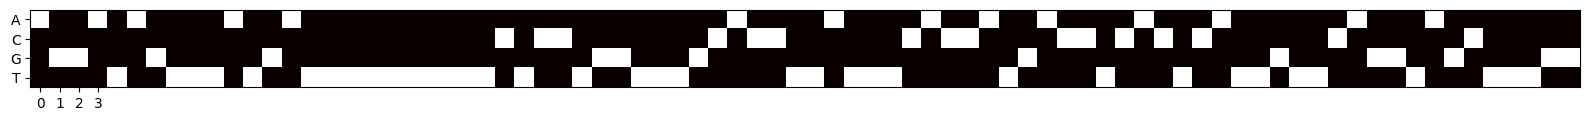

In [ ]:
def print_one_hot_encoded_dna(genome_seq):
    # Plot the one hot encoded DNA sequence
    plt.figure(figsize=(20, 2))
    plt.imshow(genome_seq, cmap="hot")
    plt.xticks(range(0, genome_seq.shape[0]))
    plt.yticks(range(0, 4), ["A", "C", "G", "T"])
    plt.show()


test_print = one_hot_encode_dna(df_train.iloc[0].genome_sequence).transpose(1, 0)
print_one_hot_encoded_dna(test_print)

DNA shape:  torch.Size([32, 4, 80])
Label shape:  torch.Size([32])
Label:  tensor([1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.])
DNA:  tensor([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
         0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
         0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0

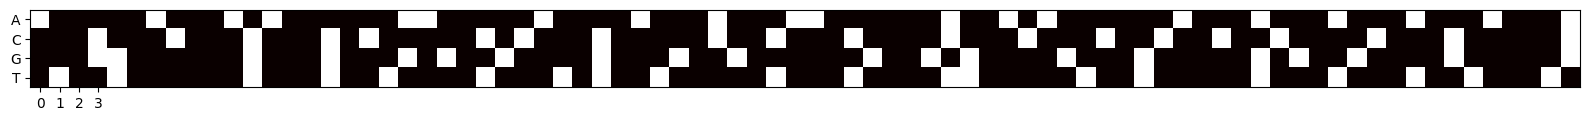

In [ ]:
dataset = GenomeDatasetCNN(
    df_train["genome_sequence"].to_numpy(), df_train["label"].to_numpy()
)
dataloader = DataLoader(dataset, batch_size=32)

# print an example of the dataset
dna, label = next(iter(dataloader))
print("DNA shape: ", dna.shape)
print("Label shape: ", label.shape)
print("Label: ", label)
print("DNA: ", dna[0])
print_one_hot_encoded_dna(dna[0])  # Print the first DNA sequence of the batch

# Make our test and train datasets and data loaders
train_dataset = GenomeDatasetCNN(
    df_train["genome_sequence"].to_numpy(), df_train["label"].to_numpy()
)
test_dataset = GenomeDatasetCNN(
    df_test["genome_sequence"].to_numpy(), df_test["label"].to_numpy()
)
train_dataloader = DataLoader(
    train_dataset, batch_size=32, shuffle=True, drop_last=True, pin_memory=True
)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

## CNN

In [ ]:
# Define the model


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        """
        # In channel: 4
        # Use 3 layers of Conv1D with kernel size (2, 3, 3) and stride (0, 1, 1), and padding (0, 1, 1)
        The in channels are: (4, 16, 32)
        The out channels are: (16, 32, 64)
        # Use 1 layer of MaxPool1D with kernel size (2) and stride (2)
        # Use 2 layers of Linear with 128 and 64 neurons
        # Use 1 layer of Linear with 1 neuron
        """

        self.conv1 = nn.Conv1d(4, 16, 2, stride=1, padding=0)
        self.conv2 = nn.Conv1d(16, 32, 3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(32, 64, 3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(19 * 64, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x


model = CNN()

In [ ]:
# Train the model
def train_model(
    model, optimizer, criterion, dataloader, eval_dataloader, epochs=10, device="cpu"
):
    losses = []
    accuracies = []
    for _ in range(epochs):
        train_loss = 0
        model.train()
        for batch_idx, (genome_seq, label) in tqdm(
            enumerate(dataloader), total=len(dataloader)
        ):
            optimizer.zero_grad()
            genome_seq = genome_seq.to(device)
            label = label.to(device)
            output = model(genome_seq)
            loss = criterion(output.view(-1), label)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        print("Train loss: ", train_loss / len(dataloader))
        losses.append(train_loss / len(dataloader))

        model.eval()
        y_true = []
        y_pred = []
        for batch_idx, (genome_seq, label) in enumerate(eval_dataloader):
            output = model(genome_seq)
            y_true.extend(label.numpy())
            y_pred.extend(output.argmax(axis=1).cpu().numpy())
        accuracies.append(accuracy_score(y_true, y_pred))

    return model, losses, accuracies

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = nn.DataParallel(model)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)
model, losses, accuracies = train_model(
    model,
    optimizer,
    criterion,
    train_dataloader,
    test_dataloader,
    epochs=15,
    device=device,
)

100%|██████████| 2500/2500 [00:14<00:00, 172.45it/s]


Train loss:  0.6932496196269989


100%|██████████| 2500/2500 [00:13<00:00, 180.30it/s]


Train loss:  0.6931665858268737


100%|██████████| 2500/2500 [00:14<00:00, 167.45it/s]


Train loss:  0.6931670973300934


100%|██████████| 2500/2500 [00:13<00:00, 181.31it/s]


Train loss:  0.6931713379621506


100%|██████████| 2500/2500 [00:14<00:00, 173.03it/s]


Train loss:  0.6931791742086411


100%|██████████| 2500/2500 [00:13<00:00, 178.78it/s]


Train loss:  0.6931776783943177


100%|██████████| 2500/2500 [00:14<00:00, 173.33it/s]


Train loss:  0.6931836221694946


100%|██████████| 2500/2500 [00:13<00:00, 178.79it/s]


Train loss:  0.693159950375557


100%|██████████| 2500/2500 [00:13<00:00, 179.90it/s]


Train loss:  0.6931603684663773


100%|██████████| 2500/2500 [00:14<00:00, 171.06it/s]


Train loss:  0.693187800192833


100%|██████████| 2500/2500 [00:13<00:00, 180.71it/s]


Train loss:  0.6931726255893708


100%|██████████| 2500/2500 [00:14<00:00, 172.14it/s]


Train loss:  0.6931788826227188


100%|██████████| 2500/2500 [00:14<00:00, 178.41it/s]


Train loss:  0.6931809585809707


100%|██████████| 2500/2500 [00:14<00:00, 172.93it/s]


Train loss:  0.6931740037441254


100%|██████████| 2500/2500 [00:14<00:00, 175.27it/s]


Train loss:  0.6931683916330338


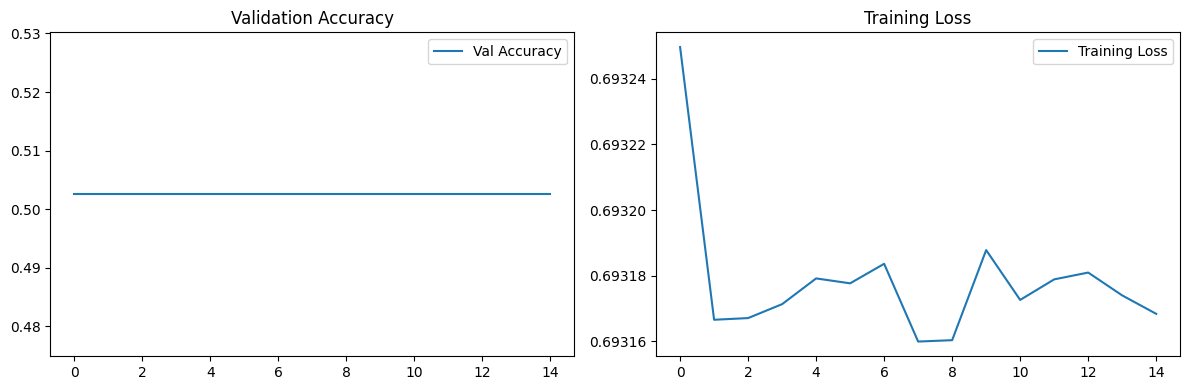

In [ ]:
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracies, label="Val Accuracy")
plt.title("Validation Accuracy")
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(losses, label="Training Loss")
plt.title("Training Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Compute accuracy on the test set
def compute_accuracy(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    for batch_idx, (genome_seq, label) in enumerate(dataloader):
        output = model(genome_seq)
        y_true.extend(label.numpy())
        y_pred.extend(output.argmax(axis=1).cpu().numpy())
    return accuracy_score(y_true, y_pred)


print("Accuracy on the test set: ", compute_accuracy(model, test_dataloader))

Accuracy on the test set:  0.50255


The 1D conv model seem to be adapting better to the data. However the stillness of the training's accuracy shows how hard is the network struggling.

---

## Genomic Sequences Pre-trained BERT
The Bidirectional Encoder Representations from Transformers (BERT) model has shown promise in various NLP tasks. A version of BERT pre-trained on genomic sequences can potentially capture the contextual relationships between nucleotides in DNA sequences, thereby aiding in accurate classification.

Let's start first using the weights of the papers of DNA bert where a pre-trained model is available.

https://colab.research.google.com/github/abhimishra91/transformers-tutorials/blob/master/transformers_multi_label_classification.ipynb#scrollTo=ikfbFlNHgi8T

https://huggingface.co/zhihan1996/DNABERT-2-117M

In [ ]:
!pip install transformers==4.28 einops torch torchvision torchaudio transformers tqdm matplotlib scikit-learn pandas numpy

In [ ]:
import transformers
import torch
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn import metrics

In [ ]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 90
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 1e-03

tokenizer = AutoTokenizer.from_pretrained(
    "zhihan1996/DNABERT-2-117M", trust_remote_code=True
)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.genome_sequence = dataframe.genome_sequence
        self.targets = dataframe.label.to_numpy()
        self.max_len = max_len

    def __len__(self):
        return len(self.genome_sequence)

    def __getitem__(self, index):
        genome_seq = str(self.genome_sequence.iloc[index])
        inputs = self.tokenizer.encode_plus(
            genome_seq,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
        )
        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]

        return {
            "ids": torch.tensor(ids, dtype=torch.long),
            "mask": torch.tensor(mask, dtype=torch.long),
            "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
            "targets": torch.tensor(self.targets[index], dtype=torch.float),
        }

In [ ]:
# Creating the dataset and dataloader for the neural network
print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(df_train.shape))
print("TEST Dataset: {}".format(df_test.shape))

training_set = CustomDataset(df_train, tokenizer, MAX_LEN)
testing_set = CustomDataset(df_test, tokenizer, MAX_LEN)

FULL Dataset: (19799984, 2)
TRAIN Dataset: (80000, 2)
TEST Dataset: (20000, 2)


In [ ]:
train_params = {"batch_size": TRAIN_BATCH_SIZE, "shuffle": True, "num_workers": 0}

test_params = {"batch_size": VALID_BATCH_SIZE, "shuffle": True, "num_workers": 0}

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model.


class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()

        self.l1 = AutoModel.from_pretrained(
            "zhihan1996/DNABERT-2-117M", trust_remote_code=True
        )
        self.l3 = torch.nn.Linear(768, 1)

    def forward(self, ids, mask, token_type_ids):
        _, output_1 = self.l1(
            ids, attention_mask=mask, token_type_ids=token_type_ids, return_dict=False
        )
        output = self.l3(output_1)

        return output


model = BERTClass()
model.to(device)

Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
/root/.cache/huggingface/modules/transformers_modules/zhihan1996/DNABERT-2-117M/81ac6a98387cf94bc283553260f3fa6b88cef2fa/bert_layers.py:125: UserWarning: Unable to import Triton; defaulting MosaicBERT attention implementation to pytorch (this will reduce throughput when using this model).
  warnings.warn(
Some weights of the model checkpoint at zhihan1996/DNABERT-2-117M were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(4096, 768, padding_idx=0)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertUnpadAttention(
            (self): BertUnpadSelfAttention(
              (dropout): Dropout(p=0.0, inplace=False)
              (Wqkv): Linear(in_features=768, out_features=2304, bias=True)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (mlp): BertGatedLinearUnitMLP(
            (gated_layers): Linear(in_features=768, out_features

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

In [ ]:
def train(epoch):
    model.train()
    total_loss = 0
    for _, data in tqdm(enumerate(training_loader, 0), total=len(training_loader)):
        ids = data["ids"].to(device, dtype=torch.long)
        mask = data["mask"].to(device, dtype=torch.long)
        token_type_ids = data["token_type_ids"].to(device, dtype=torch.long)
        targets = data["targets"].to(device, dtype=torch.float)

        outputs = model(ids, mask, token_type_ids)
        optimizer.zero_grad()
        loss = loss_fn(outputs.view(-1), targets)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return total_loss / len(training_loader)

  0%|          | 0/2500 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 2500/2500 [15:08<00:00,  2.75it/s]


loss at epoch  0 :  0.6940998448610306


100%|██████████| 2500/2500 [15:09<00:00,  2.75it/s]


loss at epoch  1 :  0.6933075151205063


100%|██████████| 2500/2500 [15:10<00:00,  2.75it/s]

loss at epoch  2 :  0.6934334316968918


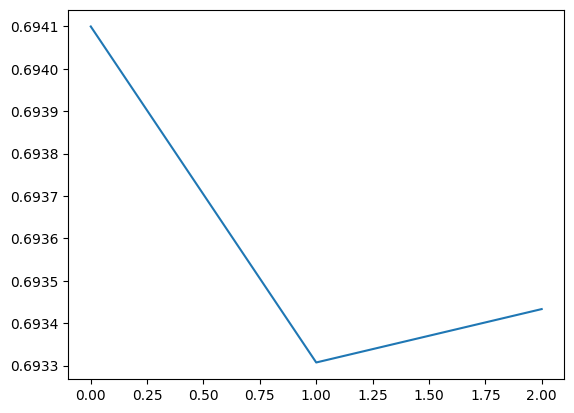

In [ ]:
losses = []
for epoch in range(EPOCHS):
    losses.append(train(epoch))
    print("loss at epoch ", epoch, ": ", losses[-1])

plt.plot(losses)

In [ ]:
def validation(epoch):
    model.eval()
    fin_targets = []
    fin_outputs = []
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data["ids"].to(device, dtype=torch.long)
            mask = data["mask"].to(device, dtype=torch.long)
            token_type_ids = data["token_type_ids"].to(device, dtype=torch.long)
            targets = data["targets"].to(device, dtype=torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
outputs, targets = validation(1)
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average="micro")
f1_score_macro = metrics.f1_score(targets, outputs, average="macro")
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.4938
F1 Score (Micro) = 0.4938
F1 Score (Macro) = 0.33056634087561926


Our first obeservation is that this approach is very costly when it comes to trainig time/memory requirements. 
Moreover, is seem that the model is not able to learn anything from the data as the accuracy is under 50% which is the accuracy of random guessing with bad luck...

Let's also try with another set of weights, this time it is from the AIRI institute.

The following code is pretty much the same as the one from the previous section, we just load the weights from another model. 

As the model is different, we need to change the dataset.

In [ ]:
!pip install torch torchvision torchaudio transformers scikit-learn matplotlib tqdm deepspeed

In [ ]:
import transformers
import torch
from transformers import BertTokenizer, BertModel, BertConfig
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from sklearn import metrics
from tqdm import tqdm
from matplotlib import pyplot as plt

In [ ]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 90
TRAIN_BATCH_SIZE = 64
VALID_BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 1e-02

tokenizer = AutoTokenizer.from_pretrained("AIRI-Institute/gena-lm-bert-base", trust_remote_code=True)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.genome_sequence = dataframe.genome_sequence
        self.targets = dataframe.label.to_numpy()
        self.max_len = max_len

    def __len__(self):
        return len(self.genome_sequence)

    def __getitem__(self, index):
        genome_seq = str(self.genome_sequence.iloc[index])
        inputs = self.tokenizer.encode_plus(
            genome_seq,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
        )
        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]

        return {
            "ids": torch.tensor(ids, dtype=torch.long),
            "mask": torch.tensor(mask, dtype=torch.long),
            "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
            "targets": torch.tensor(self.targets[index], dtype=torch.float),
        }

In [ ]:
# Creating the dataset and dataloader for the neural network
print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(df_train.shape))
print("TEST Dataset: {}".format(df_test.shape))

training_set = CustomDataset(df_train, tokenizer, MAX_LEN)
testing_set = CustomDataset(df_test, tokenizer, MAX_LEN)

FULL Dataset: (19799984, 2)
TRAIN Dataset: (80000, 2)
TEST Dataset: (20000, 2)


In [ ]:
train_params = {"batch_size": TRAIN_BATCH_SIZE, "shuffle": True, "num_workers": 0}

test_params = {"batch_size": VALID_BATCH_SIZE, "shuffle": True, "num_workers": 0}

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model.


class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()

        self.l1 = AutoModel.from_pretrained("AIRI-Institute/gena-lm-bert-base", trust_remote_code=True)
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 1)

    def forward(self, ids, mask, token_type_ids):
        _, output_1 = self.l1(
            ids, attention_mask=mask, token_type_ids=token_type_ids, return_dict=False
        )
        output_2 = self.l2(output_1)
        output = self.l3(output_2)

        return output


model = BERTClass()
model.to(device)

Some weights of BertModel were not initialized from the model checkpoint at AIRI-Institute/gena-lm-bert-base and are newly initialized: ['bert.encoder.layer.3.attention.output.LayerNorm.weight', 'bert.encoder.layer.3.output.LayerNorm.bias', 'bert.encoder.layer.9.output.LayerNorm.weight', 'bert.encoder.layer.6.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.10.output.LayerNorm.bias', 'bert.encoder.layer.7.output.LayerNorm.weight', 'bert.encoder.layer.11.output.LayerNorm.bias', 'bert.encoder.layer.7.output.LayerNorm.bias', 'bert.encoder.layer.11.output.LayerNorm.weight', 'bert.encoder.layer.3.output.LayerNorm.weight', 'bert.encoder.layer.10.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.output.LayerNorm.bias', 'bert.encoder.layer.8.output.LayerNorm.weight', 'bert.encoder.layer.11.attention.output.LayerNo

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

In [ ]:
def train(epoch):
    model.train()
    total_loss = 0
    for _, data in tqdm(enumerate(training_loader, 0), total=len(training_loader)):
        ids = data["ids"].to(device, dtype=torch.long)
        mask = data["mask"].to(device, dtype=torch.long)
        token_type_ids = data["token_type_ids"].to(device, dtype=torch.long)
        targets = data["targets"].to(device, dtype=torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs.view(-1), targets)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return total_loss / len(training_loader)

  0%|          | 0/1250 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 1250/1250 [10:36<00:00,  1.96it/s]


loss at epoch  0 :  0.775286752986908


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]


loss at epoch  1 :  0.7864574189186097


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]


loss at epoch  2 :  0.7764403200626373


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]


loss at epoch  3 :  0.7774056327819824


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]


loss at epoch  4 :  0.7812005206108094


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]


loss at epoch  5 :  0.7675274605751038


100%|██████████| 1250/1250 [10:34<00:00,  1.97it/s]


loss at epoch  6 :  0.7817751158714294


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]


loss at epoch  7 :  0.7843246402740478


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]


loss at epoch  8 :  0.7757829966068268


100%|██████████| 1250/1250 [10:35<00:00,  1.97it/s]

loss at epoch  9 :  0.7828727591514587


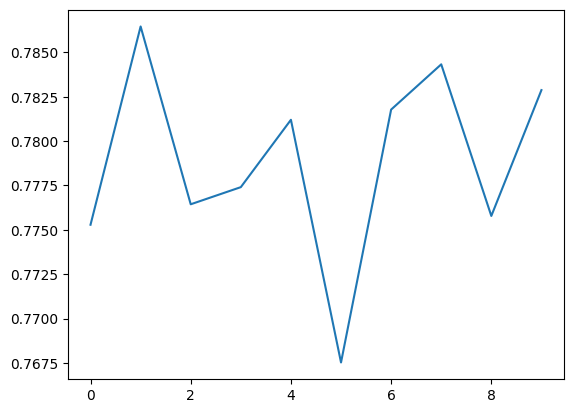

In [ ]:
losses = []
for epoch in range(EPOCHS):
    losses.append(train(epoch))
    print("loss at epoch ", epoch, ": ", losses[-1])

plt.plot(losses)

In [ ]:
def validation(epoch):
    model.eval()
    fin_targets = []
    fin_outputs = []
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data["ids"].to(device, dtype=torch.long)
            mask = data["mask"].to(device, dtype=torch.long)
            token_type_ids = data["token_type_ids"].to(device, dtype=torch.long)
            targets = data["targets"].to(device, dtype=torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
outputs, targets = validation(1)
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average="micro")
f1_score_macro = metrics.f1_score(targets, outputs, average="macro")
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.4938
F1 Score (Micro) = 0.4938
F1 Score (Macro) = 0.33056634087561926


Here we have the same bad results as the previous one. 

It seems important to note that this model had much faster training time which enabled for faster feedback. However, the results are still not good.

Our approach on Bert is either wrong or the model is not able to learn anything from the data provided.

---

## Long Short-Term Memory Networks (LSTM)
Long Short-Term Memory networks (LSTM) are a type of recurrent neural network capable of learning long-term dependencies in data. Given the sequential nature of DNA, LSTMs can be employed to capture the inherent dependencies between nucleotides over varying sequence lengths.

In [12]:
# Placeholder for LSTM model code

---

## Random Forest
Random Forest is a versatile and robust machine learning algorithm capable of handling a mix of data types. By encoding the DNA sequences appropriately, Random Forest can be utilized to identify the distinguishing features between human and gorilla DNA.

In [3]:
!pip install optuna scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [23]:
import optuna
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import HashingVectorizer

In [35]:
data_1000 = data.sample(n=1000000 // 10)

In [36]:
# Getting the shape of the dataset
dataset_shape = data_1000.shape
print(
    f"The dataset contains {dataset_shape[0]} samples and {dataset_shape[1]} columns."
)

# Checking the distribution of labels
label_distribution = data_1000["species"].value_counts(normalize=True)
label_distribution

The dataset contains 100000 samples and 4 columns.


species
Homo_sapiens       0.50028
Gorilla_gorilla    0.49972
Name: proportion, dtype: float64

In [37]:
# Define a function to convert a DNA sequence into overlapping k-mers
def kmerizer(seq, k=6):
    return [seq[i : i + k] for i in range(len(seq) - k + 1)]


# Test the function with a single DNA sequence
# print(get_kmers(data_1000['genome_sequence'][0]))

hash_vectorizer = HashingVectorizer(
    analyzer=kmerizer, n_features=2**20
)  # Adjust n_features to manage memory usage

# Apply the vectorizer to the genome_sequence column of the DataFrame
X = hash_vectorizer.fit_transform(data_1000["genome_sequence"])

# Encode species labels
data_1000["species_encoded"] = data_1000["species"].map(
    {"Homo_sapiens": 0, "Gorilla_gorilla": 1}
)
y = data_1000["species_encoded"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
def objective(trial):
    # Hyperparameters to be optimized
    n_estimators = trial.suggest_int("n_estimators", 10, 200)  # Expanded range
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    min_samples_split = trial.suggest_float("min_samples_split", 0.1, 1)
    min_samples_leaf = trial.suggest_float("min_samples_leaf", 0.1, 0.5)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 128, log=True)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0.0, 1.0)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        bootstrap=bootstrap,
        random_state=50,
    )

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy


optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Results of the optimization
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial: {study.best_trial.params}")

[I 2023-10-14 16:32:36,549] A new study created in memory with name: no-name-79f3cd72-899e-40a2-b59b-bcd6eb355275
[I 2023-10-14 16:32:39,620] Trial 0 finished with value: 0.49965 and parameters: {'n_estimators': 158, 'criterion': 'log_loss', 'max_depth': 17, 'min_samples_split': 0.3880243171996576, 'min_samples_leaf': 0.4247838122008928, 'min_weight_fraction_leaf': 0.170287707952885, 'max_features': 'log2', 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.6467542020296969, 'bootstrap': True}. Best is trial 0 with value: 0.49965.
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2023-10-14 16:32:40,715] Trial 1 finished with value: 0.49965 and parameters: {'n_estimators': 52, 'criterion': '

Number of finished trials: 100
Best trial: {'n_estimators': 158, 'criterion': 'log_loss', 'max_depth': 17, 'min_samples_split': 0.3880243171996576, 'min_samples_leaf': 0.4247838122008928, 'min_weight_fraction_leaf': 0.170287707952885, 'max_features': 'log2', 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.6467542020296969, 'bootstrap': True}


In [44]:
# Check the dimensions and the type of the feature matrix
print(X.shape, type(X))

(100000, 1048576) <class 'scipy.sparse.csr.csr_matrix'>


In [45]:
# Assumez que best_params est le dictionnaire des meilleurs paramètres retournés par Optuna
best_params = study.best_trial.params

# Créez un nouveau classificateur Random Forest avec ces paramètres
final_classifier = RandomForestClassifier(**best_params, random_state=50, verbose=1)

# Entraînez le classificateur sur l'ensemble d'entraînement
final_classifier.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
final_predictions = final_classifier.predict(X_test)

# Évaluez la performance du classificateur
final_accuracy = accuracy_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)
class_report = classification_report(y_test, final_predictions)

# Print les métriques d'évaluation
print(f"Final Accuracy: {final_accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


Final Accuracy: 0.49965
Confusion Matrix:
[[ 9993     0]
 [10007     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9993
           1       0.00      0.00      0.00     10007

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even with few data, Random Forest is not able to discern anything from it.

This is probably due to the fact that the data is too complex for this model.

We also tried RandomForest on more data but it didn't yield better results, it also was very costly in terms of memory and time.

---

## Multi Layer Perceptron (MLP)
Multi Layer Perceptron (MLP) is a class of feedforward artificial neural network. By flattening the DNA sequences and employing a suitable encoding scheme, MLPs can be trained to differentiate between human and gorilla DNA based on the input features.

The idea being that the MLP will be able to learn the patterns in the data and classify the sequences accordingly.

This was also a more general approach to the problem as MLPs are able to learn from any kind of data.

In [ ]:
!pip install sklearn-genetic-opt scikit-learn tqdm matplotlib numpy pandas

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

2023-10-14 18:11:02.666477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 18:11:03.900152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
param_grid = {
    "tol": Continuous(1e-2, 1e10, distribution="log-uniform"),
    "learning_rate": Categorical(["constant", "adaptive"]),
    "hidden_layer_sizes": Integer(10, 1000),
    "max_iter": Integer(100, 1000),
}

In [ ]:
# The base classifier to tune
clf = MLPClassifier(
    early_stopping=True, random_state=random_state, activation="relu", solver="adam"
)

# Our cross-validation strategy (it could be just an int)
cv = StratifiedKFold(n_splits=3, shuffle=True)

# The main class from sklearn-genetic-opt
evolved_estimator = GASearchCV(
    estimator=clf,
    cv=cv,
    scoring="accuracy",
    param_grid=param_grid,
    n_jobs=-1,
    verbose=True,
    population_size=20,
    generations=5,
)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=2048, shuffle=True
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=2048, shuffle=True
)

for mini_batch in tqdm(train_dataloader, total=len(train_dataloader)):
    X_train, y_train = mini_batch
    X_train = X_train.reshape(X_train.shape[0], -1)
    evolved_estimator.fit(X_train, y_train)

  0%|          | 0/40 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.498685	0.0082103  	0.513212   	0.484381   
1  	40    	0.508744	0.00770474 	0.521487   	0.492679   
2  	40    	0.512236	0.00521099 	0.521487   	0.499503   
3  	40    	0.513773	0.00557615 	0.521487   	0.502442   
4  	40    	0.515701	0.00514096 	0.521481   	0.502439   
5  	40    	0.514528	0.00649357 	0.522457   	0.503425   


  2%|▎         | 1/40 [03:56<2:33:57, 236.85s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.504443	0.0105353  	0.528329   	0.477536   
1  	40    	0.510058	0.0074114  	0.524894   	0.494137   
2  	40    	0.51582 	0.00489588 	0.52345    	0.506337   
3  	40    	0.52283 	0.00655065 	0.533696   	0.514644   
4  	40    	0.52178 	0.00834658 	0.533696   	0.504895   
5  	40    	0.521216	0.00918099 	0.533696   	0.503408   


  5%|▌         | 2/40 [09:35<3:07:53, 296.67s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.511769	0.0110913  	0.527338   	0.490735   
1  	40    	0.520484	0.0095636  	0.540037   	0.504396   
2  	40    	0.521313	0.0100477  	0.540037   	0.505371   
3  	40    	0.523365	0.00795575 	0.540032   	0.507331   
4  	40    	0.524315	0.00628912 	0.536626   	0.51612    
5  	40    	0.523923	0.00576991 	0.536626   	0.515125   


  8%|▊         | 3/40 [15:08<3:13:08, 313.20s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.510866	0.00778352 	0.528319   	0.497563   
1  	40    	0.519874	0.00729202 	0.533208   	0.508294   
2  	40    	0.523952	0.00518228 	0.533208   	0.514653   
3  	40    	0.524148	0.00623212 	0.533208   	0.507809   
4  	40    	0.526346	0.00607857 	0.533208   	0.509771   
5  	40    	0.526837	0.00613137 	0.531738   	0.513669   


 10%|█         | 4/40 [20:09<3:05:08, 308.56s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.518748	0.00606619 	0.532716   	0.510741   
1  	40    	0.52441 	0.00440474 	0.532716   	0.515618   
2  	40    	0.524632	0.00396133 	0.532716   	0.518062   
3  	40    	0.526071	0.0056131  	0.535156   	0.513181   
4  	40    	0.527099	0.00693648 	0.535156   	0.513198   
5  	40    	0.528369	0.00704861 	0.535161   	0.515626   


 12%|█▎        | 5/40 [25:43<3:05:19, 317.71s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.488429	0.0123596  	0.524899   	0.473633   
1  	40    	0.501415	0.00764229 	0.524899   	0.488774   
2  	40    	0.507054	0.00886358 	0.524899   	0.49561    
3  	40    	0.514676	0.00759128 	0.524899   	0.50049    
4  	40    	0.514382	0.0065182  	0.524899   	0.50049    
5  	40    	0.51526 	0.00681495 	0.524899   	0.50342    


 15%|█▌        | 6/40 [31:33<3:06:12, 328.61s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.497315	0.00941182 	0.515134   	0.479986   
1  	40    	0.505174	0.00665919 	0.515134   	0.493175   
2  	40    	0.50896 	0.00517129 	0.515134   	0.501466   
3  	40    	0.509933	0.00620115 	0.516598   	0.498527   
4  	40    	0.512816	0.00635069 	0.522457   	0.498527   
5  	40    	0.515232	0.00597385 	0.522457   	0.501473   


 18%|█▊        | 7/40 [37:20<3:04:08, 334.80s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.506323	0.00943555 	0.520993   	0.491202   
1  	40    	0.515598	0.0068931  	0.522457   	0.500979   
2  	40    	0.521387	0.00664265 	0.534192   	0.507317   
3  	40    	0.524294	0.00631432 	0.534192   	0.510744   
4  	40    	0.52603 	0.00673795 	0.538094   	0.514171   
5  	40    	0.522049	0.00742426 	0.534192   	0.510738   


 20%|██        | 8/40 [43:09<3:00:53, 339.16s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.502321	0.00798495 	0.516607   	0.489743   
1  	40    	0.508302	0.00589714 	0.522956   	0.499504   
2  	40    	0.512357	0.00695804 	0.526358   	0.502933   
3  	40    	0.516774	0.00708559 	0.526358   	0.504878   
4  	40    	0.51741 	0.00407694 	0.523438   	0.509762   
5  	40    	0.519339	0.0047173  	0.523438   	0.504386   


 22%|██▎       | 9/40 [49:05<2:58:01, 344.57s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.505079	0.0104477  	0.5288     	0.486813   
1  	40    	0.513209	0.00743001 	0.5288     	0.499015   
2  	40    	0.515917	0.00590084 	0.528314   	0.500485   
3  	40    	0.516408	0.00664467 	0.528314   	0.504885   
4  	40    	0.518018	0.00908636 	0.532232   	0.503415   
5  	40    	0.519215	0.00783945 	0.532232   	0.497072   


 25%|██▌       | 10/40 [53:40<2:41:27, 322.93s/it]

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	20    	0.50276	0.00993498 	0.526864   	0.485352   
1  	40    	0.51062	0.00793514 	0.526864   	0.498532   
2  	40    	0.515941	0.00565127 	0.526864   	0.500005   
3  	40    	0.519702	0.0051276  	0.528812   	0.513672   
4  	40    	0.51738 	0.00695647 	0.528812   	0.503902   
5  	40    	0.518969	0.00440375 	0.528812   	0.512701   


 28%|██▊       | 11/40 [59:10<2:37:05, 325.02s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.502465	0.00825292 	0.521971   	0.487309   
1  	40    	0.509449	0.00717156 	0.521971   	0.498541   
2  	40    	0.514062	0.00663982 	0.526356   	0.504391   
3  	40    	0.513237	0.00737696 	0.521971   	0.493654   
4  	40    	0.517408	0.00529564 	0.523439   	0.50635    
5  	40    	0.516137	0.00650752 	0.524917   	0.504876   


 30%|███       | 12/40 [1:04:17<2:29:12, 319.72s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.491457	0.0117886  	0.517093   	0.468269   
1  	40    	0.502055	0.00826984 	0.517093   	0.486803   
2  	40    	0.505374	0.00393375 	0.51319    	0.500015   
3  	40    	0.507494	0.00659232 	0.518559   	0.493171   
4  	40    	0.509836	0.00414478 	0.514648   	0.500974   
5  	40    	0.509567	0.00478609 	0.515131   	0.500974   


 32%|███▎      | 13/40 [1:08:10<2:11:58, 293.29s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.494432	0.008656   	0.508788   	0.471199   
1  	40    	0.504051	0.00744926 	0.514165   	0.4839     
2  	40    	0.509057	0.0056038  	0.514645   	0.491207   
3  	40    	0.510867	0.00531692 	0.516613   	0.495125   
4  	40    	0.510256	0.00530404 	0.519039   	0.49657    
5  	40    	0.509499	0.00566244 	0.519039   	0.496091   


 35%|███▌      | 14/40 [1:12:05<1:59:26, 275.63s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.511351	0.0112474  	0.536132   	0.488286   
1  	40    	0.519359	0.0065757  	0.533209   	0.505379   
2  	40    	0.522752	0.00627402 	0.531735   	0.503896   
3  	40    	0.527125	0.00594824 	0.535164   	0.514162   
4  	40    	0.524636	0.0081998  	0.53418    	0.509765   
5  	40    	0.526   	0.00843065 	0.53418    	0.505363   


 38%|███▊      | 15/40 [1:17:00<1:57:18, 281.54s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.502417	0.00848111 	0.515617   	0.484858   
1  	40    	0.508395	0.00694687 	0.526361   	0.498535   
2  	40    	0.513111	0.00508521 	0.518081   	0.500988   
3  	40    	0.514261	0.00667442 	0.532222   	0.5        
4  	40    	0.516799	0.00522983 	0.524419   	0.50829    
5  	40    	0.517578	0.00609527 	0.530273   	0.50829    


 40%|████      | 16/40 [1:22:02<1:55:02, 287.62s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.500144	0.00971477 	0.518547   	0.481942   
1  	40    	0.508644	0.0046381  	0.518063   	0.501954   
2  	40    	0.513453	0.00583702 	0.52197    	0.502929   
3  	40    	0.516431	0.00567453 	0.525389   	0.506345   
4  	40    	0.516674	0.00752583 	0.525389   	0.499509   
5  	40    	0.515187	0.00576505 	0.523921   	0.500495   


 42%|████▎     | 17/40 [1:27:02<1:51:44, 291.48s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.500097	0.0124277  	0.521474   	0.469729   
1  	40    	0.509353	0.00615315 	0.521474   	0.497574   
2  	40    	0.508033	0.00735152 	0.518571   	0.493643   
3  	40    	0.511014	0.00674368 	0.520508   	0.495129   
4  	40    	0.513208	0.0047366  	0.520508   	0.499008   
5  	40    	0.511793	0.0057545  	0.519047   	0.493152   


 45%|████▌     | 18/40 [1:32:21<1:49:57, 299.88s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.489575	0.00884876 	0.505377   	0.468745   
1  	40    	0.50054 	0.00651878 	0.509762   	0.486819   
2  	40    	0.501223	0.00711498 	0.509762   	0.485847   
3  	40    	0.506203	0.00492371 	0.520517   	0.498538   
4  	40    	0.504027	0.00596764 	0.520517   	0.493642   
5  	40    	0.503201	0.00653425 	0.520517   	0.489743   


 48%|████▊     | 19/40 [1:37:41<1:46:59, 305.69s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.509399	0.0108075  	0.522955   	0.479989   
1  	40    	0.514647	0.00498035 	0.521961   	0.500497   
2  	40    	0.516233	0.00444525 	0.521961   	0.506851   
3  	40    	0.520482	0.00391661 	0.525873   	0.509291   
4  	40    	0.520483	0.00570502 	0.528319   	0.501947   
5  	40    	0.521875	0.00449723 	0.528319   	0.511714   


 50%|█████     | 20/40 [1:41:37<1:34:59, 284.97s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.496926	0.00772282 	0.509775   	0.479486   
1  	40    	0.504958	0.00310056 	0.509281   	0.499034   
2  	40    	0.507865	0.00546284 	0.519536   	0.496588   
3  	40    	0.506398	0.00633475 	0.519536   	0.492679   
4  	40    	0.509887	0.00599174 	0.519536   	0.498529   
5  	40    	0.508545	0.00533256 	0.516601   	0.496101   


 52%|█████▎    | 21/40 [1:46:17<1:29:45, 283.46s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.498875	0.00746068 	0.512691   	0.486813   
1  	40    	0.509765	0.00550762 	0.517593   	0.497555   
2  	40    	0.510962	0.00531089 	0.517593   	0.500013   
3  	40    	0.515235	0.00360388 	0.521477   	0.504401   
4  	40    	0.516554	0.00632141 	0.525881   	0.503401   
5  	40    	0.515094	0.00501734 	0.525881   	0.505874   


 55%|█████▌    | 22/40 [1:50:11<1:20:33, 268.51s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.490187	0.0082752  	0.504895   	0.470706   
1  	40    	0.498148	0.00683988 	0.517084   	0.486828   
2  	40    	0.504124	0.00542426 	0.517084   	0.49317    
3  	40    	0.506053	0.00737289 	0.517084   	0.49122    
4  	40    	0.505957	0.00709233 	0.51759    	0.491224   
5  	40    	0.507543	0.00594747 	0.517084   	0.494635   


 57%|█████▊    | 23/40 [1:54:36<1:15:49, 267.59s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.495482	0.0085394  	0.515633   	0.478019   
1  	40    	0.505543	0.00849456 	0.515633   	0.488288   
2  	40    	0.509642	0.00541962 	0.520015   	0.500972   
3  	40    	0.51262 	0.0062705  	0.52343    	0.497558   
4  	40    	0.515991	0.00599206 	0.530772   	0.508789   
5  	40    	0.51609 	0.00924722 	0.530772   	0.49121    


 60%|██████    | 24/40 [1:59:57<1:15:35, 283.47s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.497559	0.00861196 	0.512215   	0.48194    
1  	40    	0.50188 	0.00740743 	0.517092   	0.487305   
2  	40    	0.504224	0.00746989 	0.523423   	0.493665   
3  	40    	0.507448	0.00787835 	0.523423   	0.495124   
4  	40    	0.507422	0.00609355 	0.517092   	0.491699   
5  	40    	0.50957 	0.00613409 	0.521978   	0.495114   


 62%|██████▎   | 25/40 [2:05:19<1:13:46, 295.10s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.497365	0.00829461 	0.51025    	0.481449   
1  	40    	0.509179	0.00755261 	0.525881   	0.494136   
2  	40    	0.5094  	0.00656768 	0.517099   	0.49415    
3  	40    	0.512671	0.00936658 	0.530283   	0.496584   
4  	40    	0.515822	0.00862684 	0.530283   	0.496584   
5  	40    	0.515579	0.00738979 	0.530283   	0.501471   


 65%|██████▌   | 26/40 [2:10:51<1:11:26, 306.19s/it]

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	20    	0.50681	0.0120467  	0.524909   	0.476565   
1  	40    	0.515967	0.00769728 	0.532234   	0.503914   
2  	40    	0.519019	0.00539151 	0.532234   	0.510256   
3  	40    	0.523903	0.00608437 	0.532234   	0.511707   
4  	40    	0.526222	0.00283987 	0.532234   	0.520023   
5  	40    	0.52659 	0.00540702 	0.543459   	0.520023   


 68%|██████▊   | 27/40 [2:14:20<1:00:01, 277.01s/it]

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	20    	0.50371	0.00771469 	0.520036   	0.488292   
1  	40    	0.509181	0.00765854 	0.529291   	0.492186   
2  	40    	0.513258	0.00453093 	0.523925   	0.508308   
3  	40    	0.513405	0.00544905 	0.523925   	0.503423   
4  	40    	0.513132	0.00403571 	0.523925   	0.507311   
5  	40    	0.513451	0.00549948 	0.523925   	0.50488    


 70%|███████   | 28/40 [2:17:51<51:27, 257.27s/it]  

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.494435	0.00751497 	0.504879   	0.479495   
1  	40    	0.499339	0.00677811 	0.509765   	0.485847   
2  	40    	0.50464 	0.00498903 	0.512703   	0.493656   
3  	40    	0.507471	0.00476011 	0.51465    	0.499031   
4  	40    	0.509935	0.00412223 	0.51465    	0.500494   
5  	40    	0.513012	0.00411762 	0.521002   	0.50586    


 72%|███████▎  | 29/40 [2:22:45<49:09, 268.12s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.498585	0.0072585  	0.512201   	0.485832   
1  	40    	0.508227	0.00610368 	0.516105   	0.496578   
2  	40    	0.506469	0.0053968  	0.516105   	0.499517   
3  	40    	0.507321	0.00593425 	0.516105   	0.494614   
4  	40    	0.507516	0.00650924 	0.516105   	0.496084   
5  	40    	0.509616	0.00746072 	0.517093   	0.493657   


 75%|███████▌  | 30/40 [2:27:35<45:49, 274.90s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.497656	0.00993836 	0.52148    	0.479495   
1  	40    	0.512276	0.00737103 	0.522457   	0.497066   
2  	40    	0.514892	0.00614348 	0.522457   	0.504405   
3  	40    	0.511792	0.00788419 	0.522457   	0.496089   
4  	40    	0.512109	0.00797683 	0.521964   	0.495117   
5  	40    	0.51245 	0.00550416 	0.521964   	0.499993   


 78%|███████▊  | 31/40 [2:34:04<46:20, 308.91s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.515917	0.0106752  	0.533702   	0.496584   
1  	40    	0.52771 	0.00617609 	0.536134   	0.514655   
2  	40    	0.527832	0.00659342 	0.536134   	0.511717   
3  	40    	0.529053	0.00688069 	0.539065   	0.510258   
4  	40    	0.526172	0.00731504 	0.539065   	0.511226   
5  	40    	0.524319	0.0092081  	0.544935   	0.506844   


 80%|████████  | 32/40 [2:38:23<39:13, 294.16s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.500877	0.00958976 	0.517577   	0.484365   
1  	40    	0.509691	0.00687076 	0.517577   	0.494629   
2  	40    	0.511961	0.00659911 	0.520505   	0.497074   
3  	40    	0.510717	0.00587437 	0.51757    	0.500975   
4  	40    	0.511182	0.0048996  	0.51757    	0.502444   
5  	40    	0.511549	0.00639208 	0.51757    	0.492185   


 82%|████████▎ | 33/40 [2:44:18<36:26, 312.40s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.506276	0.00697605 	0.517578   	0.484876   
1  	40    	0.515553	0.00510874 	0.52685    	0.506347   
2  	40    	0.518261	0.00584945 	0.529305   	0.508295   
3  	40    	0.52019 	0.0055383  	0.529305   	0.509764   
4  	40    	0.520776	0.00649917 	0.529305   	0.508302   
5  	40    	0.520996	0.00658871 	0.529305   	0.508302   


 85%|████████▌ | 34/40 [2:48:32<29:27, 294.65s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.507567	0.00971542 	0.531739   	0.493162   
1  	40    	0.512499	0.00826331 	0.531739   	0.496582   
2  	40    	0.517406	0.00683463 	0.531739   	0.505864   
3  	40    	0.519725	0.00571492 	0.531739   	0.503412   
4  	40    	0.519898	0.00648072 	0.531739   	0.509773   
5  	40    	0.523366	0.0052854  	0.531739   	0.505367   


 88%|████████▊ | 35/40 [2:53:05<24:01, 288.26s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.481421	0.00923024 	0.496099   	0.461422   
1  	40    	0.492943	0.00788276 	0.506349   	0.470697   
2  	40    	0.494555	0.00654016 	0.506349   	0.47509    
3  	40    	0.497656	0.00460228 	0.505371   	0.489752   
4  	40    	0.50078 	0.00506398 	0.507814   	0.492189   
5  	40    	0.502466	0.00681238 	0.515632   	0.487798   


 90%|█████████ | 36/40 [2:56:37<17:42, 265.52s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.497288	0.00934876 	0.514163   	0.480958   
1  	40    	0.506344	0.00812977 	0.520504   	0.490233   
2  	40    	0.512033	0.00620457 	0.520504   	0.49805    
3  	40    	0.512962	0.00652273 	0.523905   	0.500485   
4  	40    	0.509231	0.0074831  	0.520504   	0.494155   
5  	40    	0.511915	0.00537543 	0.520504   	0.500485   


 92%|█████████▎| 37/40 [3:01:31<13:41, 273.78s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.512012	0.0101134  	0.531255   	0.489265   
1  	40    	0.519165	0.00834789 	0.531255   	0.504397   
2  	40    	0.525026	0.00574818 	0.534189   	0.515618   
3  	40    	0.527979	0.00325553 	0.533208   	0.520994   
4  	40    	0.528882	0.00465155 	0.533208   	0.511716   
5  	40    	0.526413	0.0045601  	0.531256   	0.516113   


 95%|█████████▌| 38/40 [3:06:26<09:20, 280.26s/it]

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	20    	0.51272	0.00759689 	0.529299   	0.501467   
1  	40    	0.524242	0.00829995 	0.53614    	0.510747   
2  	40    	0.52307 	0.00736938 	0.53614    	0.50977    
3  	40    	0.525783	0.00862631 	0.538087   	0.506343   
4  	40    	0.529223	0.00856587 	0.54395    	0.511717   
5  	40    	0.528688	0.00558676 	0.538087   	0.515625   


 98%|█████████▊| 39/40 [3:11:12<04:41, 281.86s/it]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.479983	0.031994   	0.52344    	0.406238   
1  	40    	0.512191	0.0215121  	0.563677   	0.453304   
2  	40    	0.527021	0.0156638  	0.562385   	0.492433   
3  	40    	0.540799	0.0301578  	0.609819   	0.507752   
4  	40    	0.552925	0.0309622  	0.609819   	0.507752   


100%|██████████| 40/40 [3:11:46<00:00, 287.66s/it]

5  	40    	0.546899	0.0229995  	0.58564    	0.507383   


In [ ]:
# Score
mean_acc = 0.0
for mini_batch in tqdm(test_dataloader, total=len(test_dataloader)):
    X_test, y_test = mini_batch
    X_test = X_test.reshape(X_test.shape[0], -1)
    y_pred = evolved_estimator.predict(X_test)

    mean_acc += accuracy_score(y_test, y_pred)
mean_acc /= len(test_dataloader)

print(f"Mean accuracy per mini_batch: {mean_acc:.3f}")

100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

Mean accuracy per mini_batch: 0.495


MLPs didn't yield any good results.

Some informations are of note however:

- The model was able to learn something from the data as the accuracy was increasing with the number of epochs, however generalization was not good as we lost all progress eveytime we changed the training mini-batch.
- Mini-batching seems (obviously) the better approach as it is faster and more efficient, however it reduces our generalization capabilities.
- MLPs might be a good approach for this problem but it needs much more computational power and time to train.

## Conclusion

We tried several approaches to obtain better results than the competitors of the competition. However, we were not able to do so.

We managed to reproduce the results of the best competitors but we were not able to improve them.

Among all our approaches, it seems that MLPs and CNNs are the best.

Also, some more research is needed to find a relevant way to encode the data for the models to be able to learn from it.

All in all, this was a very interesting project as it was a very hard problem to solve and we learned a lot from it.
